In [1]:
# Importing helpful libraries

import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ckdisease/kidney_disease.csv


# **Dataset**

In [2]:
# Reading csv file
path = "/content/drive/MyDrive/Dataset/kidney_disease.csv"
df=pd.read_csv(path)
print(df)
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# **Dataset Analysis**

In [3]:
# Demonstrating statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [4]:
# Demonstrating statistics

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# **Visual Analysis**

In [5]:
# Extracting categorical and numerical columns

cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

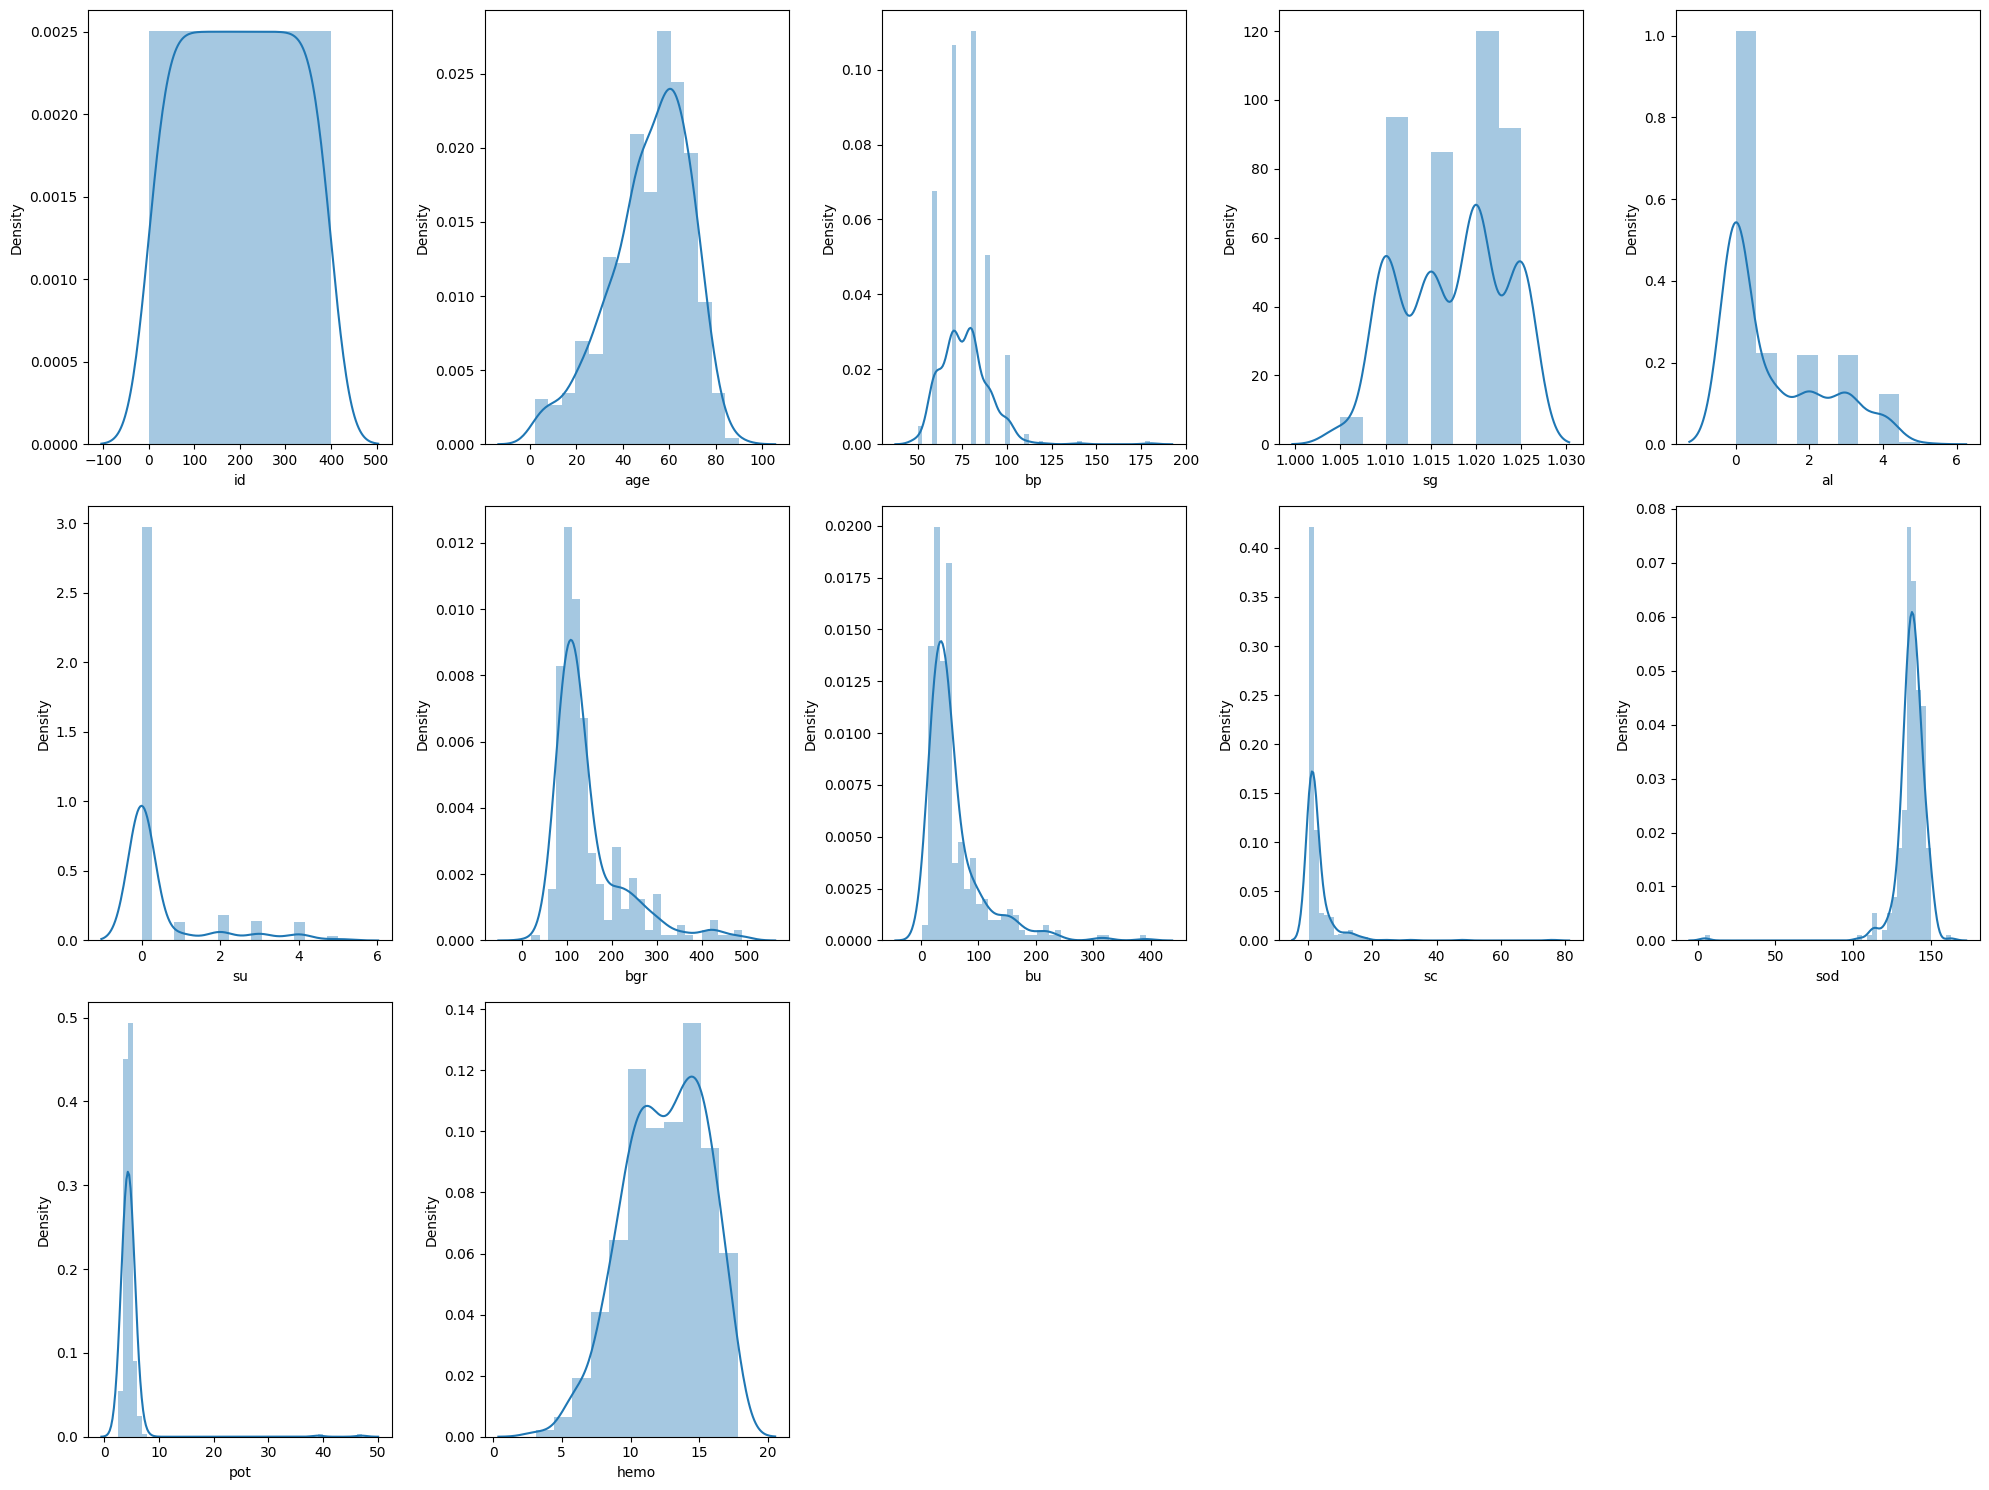

In [6]:
# Checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# **Data Cleaning**

In [7]:
# Checking whether a dataset has a NaN value or not

data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
# Cleaning data and encoding

le = LabelEncoder()

def clean_data(df):
    df['rbc'] = le.fit_transform(df['rbc'].values)
    df['pc'] = le.fit_transform(df['pc'].values)
    df['pcc'] = le.fit_transform(df['pcc'].values)
    df['ba'] = le.fit_transform(df['ba'].values)
    df['wc'] = le.fit_transform(df['wc'].values)
    df['rc'] = le.fit_transform(df['rc'].values)
    df['pcv'] = le.fit_transform(df['pcv'].values)
    df['htn'] = le.fit_transform(df['htn'].values)
    df['dm'] = le.fit_transform(df['dm'].values)
    df['cad'] = le.fit_transform(df['cad'].values)
    df['appet'] = le.fit_transform(df['appet'].values)
    df['pe'] = le.fit_transform(df['pe'].values)
    df['ane'] = le.fit_transform(df['ane'].values)
    df['pe'] = le.fit_transform(df['pe'].values)
    
    df['classification'].replace({'ckd': 1, 'ckd\t': 1, 'notckd': 0}, inplace=True)
    
    df.ffill(inplace=True)
    
    return df

data = clean_data(data)

# **Correlation**

In [9]:
# Finding correlation of our target column

data.corrwith(data['classification']).abs().sort_values(ascending=False)

classification    1.000000
id                0.838528
hemo              0.755806
sg                0.707973
al                0.610685
htn               0.549034
bgr               0.408891
sod               0.382259
bu                0.376476
dm                0.371555
appet             0.368498
pe                0.349645
pcv               0.349205
su                0.321908
ane               0.297587
sc                0.297318
bp                0.268956
rbc               0.239595
age               0.225758
pcc               0.154336
cad               0.153681
pc                0.114280
wc                0.104604
rc                0.074243
pot               0.069141
ba                0.056138
dtype: float64

In [10]:
# Data visualization of correlation

corr_matrix = data.corr().abs()
corr_matrix.style.background_gradient(cmap='turbo')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,0.187492,0.233234,0.622695,0.521769,0.262931,0.206480,0.111689,0.172634,0.025275,0.325340,0.311078,0.271528,0.399605,0.073893,0.624274,0.305442,0.112005,0.091436,0.490321,0.319953,0.134360,0.355712,0.290174,0.253351,0.838528
age,0.187492,1.000000,0.170657,0.183453,0.120852,0.190124,0.121930,0.031824,0.096779,0.010855,0.215281,0.176586,0.127515,0.074765,0.068624,0.218510,0.151930,0.048820,0.144607,0.385068,0.279096,0.205761,0.150398,0.108767,0.085920,0.225758
bp,0.233234,0.170657,1.000000,0.170938,0.152874,0.189460,0.025443,0.098722,0.020848,0.045454,0.150117,0.176728,0.136780,0.091821,0.076827,0.289964,0.163288,0.014988,0.140190,0.241513,0.176750,0.044249,0.167675,0.035391,0.171143,0.268956
sg,0.622695,0.183453,0.170938,1.000000,0.438005,0.246370,0.130718,0.128244,0.194221,0.118299,0.328758,0.301609,0.257728,0.292679,0.048353,0.557827,0.313672,0.016592,0.148078,0.359197,0.209041,0.087811,0.253268,0.272954,0.167426,0.707973
al,0.521769,0.120852,0.152874,0.438005,1.000000,0.279962,0.162382,0.283988,0.270098,0.207449,0.284735,0.415724,0.302859,0.324205,0.118502,0.539593,0.325335,0.004037,0.188359,0.468119,0.267796,0.215622,0.316360,0.391391,0.259974,0.610685
su,0.262931,0.190124,0.189460,0.246370,0.279962,1.000000,0.066124,0.078052,0.099492,0.050198,0.580477,0.163775,0.134949,0.126605,0.163646,0.201413,0.094945,0.066403,0.041368,0.284768,0.379926,0.222765,0.090475,0.114160,0.056976,0.321908
rbc,0.206480,0.121930,0.025443,0.130718,0.162382,0.066124,1.000000,0.430674,0.075644,0.126138,0.003919,0.110421,0.014052,0.020573,0.020536,0.095255,0.124006,0.180087,0.118170,0.110808,0.028769,0.017346,0.008775,0.051949,0.007508,0.239595
pc,0.111689,0.031824,0.098722,0.128244,0.283988,0.078052,0.430674,1.000000,0.335465,0.171667,0.162634,0.137906,0.018745,0.119472,0.113673,0.147947,0.233043,0.167735,0.192550,0.066831,0.011347,0.052952,0.159985,0.187009,0.106254,0.114280
pcc,0.172634,0.096779,0.020848,0.194221,0.270098,0.099492,0.075644,0.335465,1.000000,0.517293,0.141212,0.124548,0.020388,0.145970,0.015692,0.181525,0.162345,0.059704,0.083566,0.114093,0.100019,0.119754,0.126097,0.056127,0.117805,0.154336
ba,0.025275,0.010855,0.045454,0.118299,0.207449,0.050198,0.126138,0.171667,0.517293,1.000000,0.001995,0.081539,0.010973,0.016425,0.010094,0.093778,0.076798,0.066597,0.073199,0.011404,0.024067,0.086449,0.074845,0.065451,0.007937,0.056138


# **Data Preparation for Machine Learning**

In [11]:
# Sorting data for Machine Learning

X = data.drop(['classification'], axis=1)
y = data['classification']

In [12]:
# Splitting into validation and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Machine Learning**

In [13]:
# Fine tuning

import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 100),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.9),
        'num_leaves': trial.suggest_int('num_leaves', 4, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 500),
        'random_state': 10,
        'verbose' : -1
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test,y_test))

    y_pred = model.predict(X_test)
    r2 = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
study.best_params

# Train the model with best parameters
model = lgb.LGBMClassifier(n_estimators=study.best_params['n_estimators'], learning_rate=study.best_params['learning_rate'],
                            num_leaves=study.best_params['num_leaves'], min_child_samples=study.best_params['min_child_samples'],   
                            random_state=10)
model.fit(X_train, y_train, eval_set=[(X_test,y_test)])

[I 2024-02-22 08:40:35,603] A new study created in memory with name: no-name-086e8daf-3291-4660-9f09-110729506fe7
[I 2024-02-22 08:40:35,683] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 74, 'learning_rate': 0.6235043302258924, 'num_leaves': 7, 'min_child_samples': 71}. Best is trial 0 with value: 0.0.
[I 2024-02-22 08:40:35,693] Trial 1 finished with value: 0.5916079783099616 and parameters: {'n_estimators': 54, 'learning_rate': 0.3413487530127606, 'num_leaves': 19, 'min_child_samples': 378}. Best is trial 0 with value: 0.0.
[I 2024-02-22 08:40:35,705] Trial 2 finished with value: 0.5916079783099616 and parameters: {'n_estimators': 95, 'learning_rate': 0.7912593196688861, 'num_leaves': 5, 'min_child_samples': 359}. Best is trial 0 with value: 0.0.
[I 2024-02-22 08:40:35,714] Trial 3 finished with value: 0.5916079783099616 and parameters: {'n_estimators': 50, 'learning_rate': 0.6549628365995273, 'num_leaves': 12, 'min_child_samples': 326}. Best is trial 0 with valu

[LightGBM] [Info] Number of positive: 198, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618750 -> initscore=0.484246
[LightGBM] [Info] Start training from score 0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(learning_rate=0.6235043302258924, min_child_samples=71,
               n_estimators=74, num_leaves=7, random_state=10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Model accuracy: 1.0


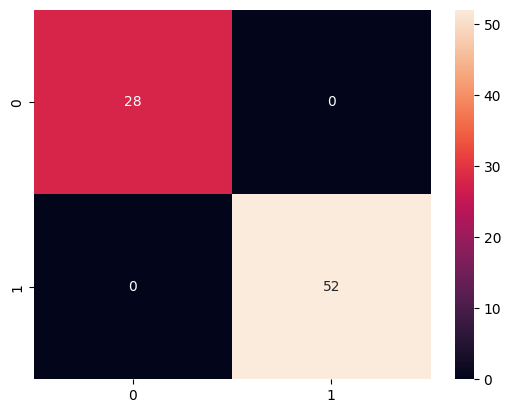

In [14]:
# Creating model (training)
model = lgb.LGBMClassifier(learning_rate=0.7104514319761557, min_child_samples=105,
               n_estimators=62, num_leaves=17, random_state=10, verbose=-1)
model.fit(X_train, y_train, eval_set=[(X_test,y_test)])

# Evaluating model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()